In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pyvis.network as Network

In [ ]:
G = nx.Graph()
G.add_node("Tom")
G.add_node("Jerry")

print(list(G))
for i in G:
    print(i)

['Tom', 'Jerry']
Tom
Jerry


In [ ]:
len(G)

2

In [ ]:
nx.number_of_nodes(G)

2

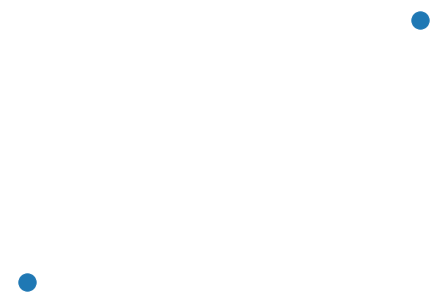

In [ ]:
nx.draw(G)

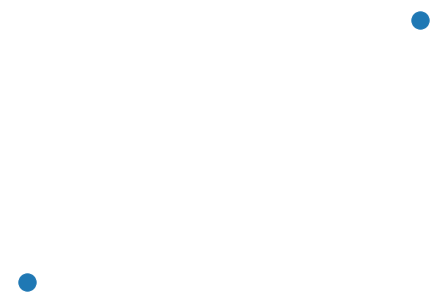

In [ ]:
G2 = nx.Graph()
G2.add_node('Lucy')
G2.add_node('Betty')
nx.draw(G2)

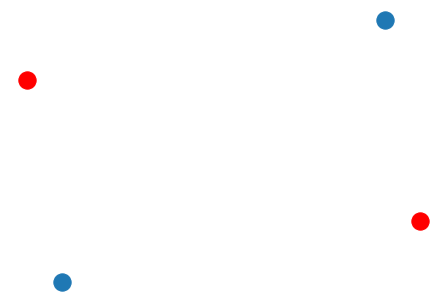

In [ ]:
nx.draw(G)
nx.draw(G2,node_color='red')
plt.show()

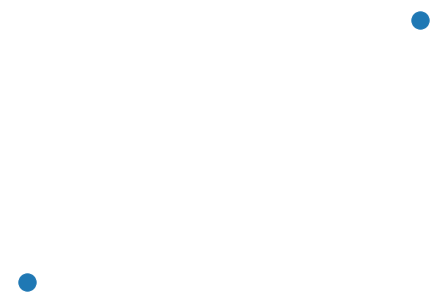

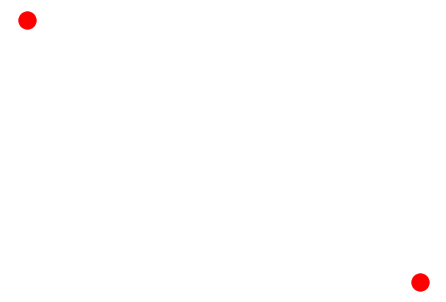

In [ ]:
plt.figure(1)
nx.draw(G)
plt.figure(2)
nx.draw(G2,node_color='red')
plt.show()

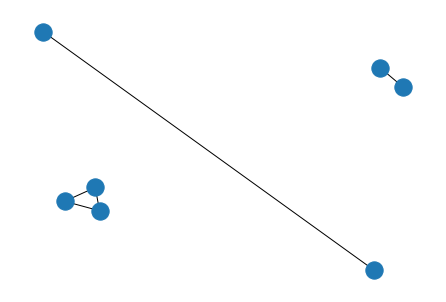

In [ ]:
G.add_edges_from([("Tom","Jerry")])
nx.draw(G)
edges = [("Tom","Lucy"),("Jolie","Betty"),("Jerry","Betty"),("Jolie","Jerry")]
G2.add_edges_from(edges)
nx.draw(G2)

In [ ]:
#G.remove_edge("Tom","Jerry")
#nx.draw(G)
#nx.draw(G2)

In [ ]:
#G2.clear()
#nx.draw(G)
#nx.draw(G2)

In [ ]:
#G.remove_edge("Tom","Jerry")

In [ ]:
nx.number_of_edges(G2)

4

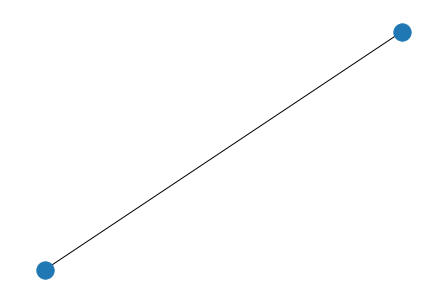

In [ ]:
nx.draw(G)

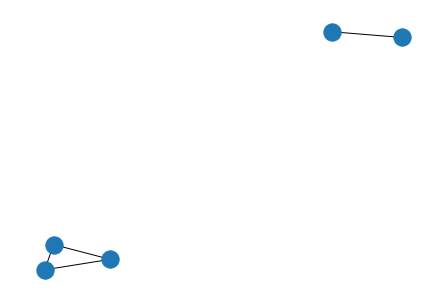

In [ ]:
nx.draw(G2)

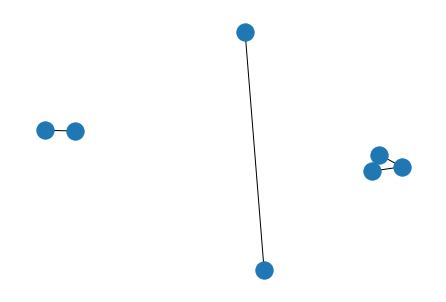

In [ ]:
nx.draw(G)
nx.draw(G2)

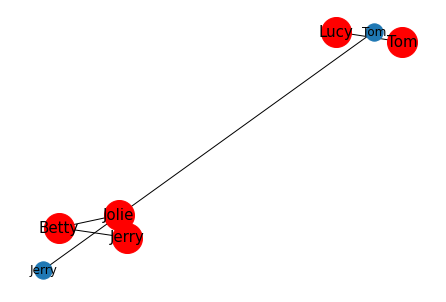

In [ ]:
nx.draw(G,with_labels=True)
nx.draw(G2,with_labels=True,font_size=15,node_color='red',node_size=900)

In [ ]:
import xlrd
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd

In [ ]:
df1 = pd.read_excel('Book1.xlsx')
df2 = pd.read_excel('Book2.xlsx')
df1.head()

,Name,School
0,Shawn,CoS
1,James,CoS
2,James,CoS
3,Tanya,CoS
4,Kathy,CoS


In [ ]:
df2.head()

,Name,School
0,George,LKCSOM
1,Robert,LKCSOM
2,Steven,LKCSOM
3,William,LKCSOM
4,Christopher,LKCSOM


In [90]:
print(len(df1))
print(len(df2))

39
55


In [91]:
names = []
for i in range(0,len(df1)):
    for x in range(0,len(df2)):
        y = (df1.Name[i],df2.Name[x])
        names.append(y)

TypeError: 'module' object is not callable

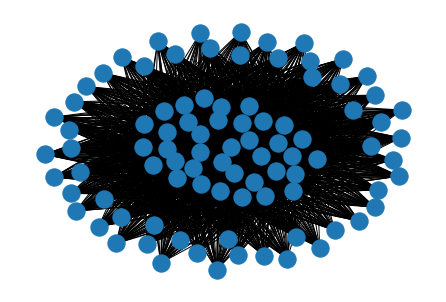

In [92]:
G3 = nx.Graph()
G3.add_edges_from(names)
nx.draw(G3)
GGG = Network()
GGG.from_nx(G3)
GGG.show('network_map.html')

In [ ]:
print(len(names) == (39*55))

True


In [93]:
df = pd.read_csv('df.csv')

In [94]:
df.node1 = df.node1.str.strip()
df.node2 = df.node2.str.strip()
df.School = df.School.str.strip()

In [95]:
school_map = dict(zip(df.node1.tolist(),df.School.tolist()))
tuple_school = list(zip(school_map.keys(),school_map.values()))

In [96]:
names = []
for i in range(len(df.node1)):
    names.append((df.node1[i],df.node2[i]))

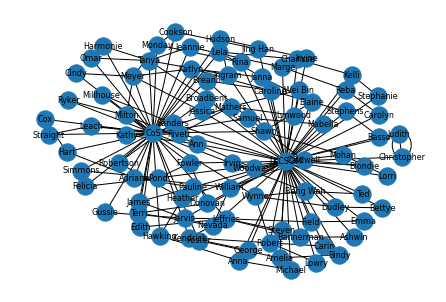

In [97]:
G = nx.Graph()
G.add_edges_from(names)
G.add_edges_from(tuple_school)
nx.draw(G,with_labels=True,font_size=8)

In [98]:
nx.has_path(G,"Elaine","Donovan")

True

In [99]:
nx.shortest_path(G,"Elaine","Heather")

['Elaine', 'LKCSOM', 'Heather']

In [100]:
nx.single_source_shortest_path(G,"Samuel",1)

{'Samuel': ['Samuel'],
 'Caldwell': ['Samuel', 'Caldwell'],
 'Breann': ['Samuel', 'Breann'],
 'Mabella': ['Samuel', 'Mabella'],
 'CoS': ['Samuel', 'CoS']}

In [101]:
from pyvis.network import Network

In [102]:
G2 = Network()
G2.from_nx(G)
G2.show('network_map.html')

In [103]:
neighbor_map = G2.get_adj_list()
neighbor_map

{'George': {'Kendrick', 'LKCSOM'},
 'Kendrick': {'CoS', 'George', 'Nevada', 'Robert'},
 'LKCSOM': {'Amelia',
  'Ann',
  'Anna',
  'Ashwin',
  'Bannerman',
  'Basso',
  'Beng Wah',
  'Bettye',
  'Bindy',
  'Blondie',
  'Broadbent',
  'Caldwell',
  'Carin',
  'Caroline',
  'Carolyn',
  'Charisse',
  'Christopher',
  'Donovan',
  'Dudley',
  'Elaine',
  'Emma',
  'Field',
  'Fowler',
  'George',
  'Heather',
  'Ingram',
  'Irvine',
  'Janna',
  'Jarvis',
  'Jessica',
  'Jing Han',
  'Judith',
  'Kelli',
  'Lorri',
  'Lowry',
  'Lynwood',
  'Mabella',
  'Marge',
  'Michael',
  'Mohan',
  'Nevada',
  'Pauline',
  'Pond',
  'Reba',
  'Rina',
  'Rivett',
  'Robert',
  'Sanders',
  'Stephanie',
  'Stephens',
  'Steven',
  'Ted',
  'Wei Bin',
  'William',
  'Woodward'},
 'Robert': {'Carin', 'Kendrick', 'LKCSOM', 'Lowry', 'Wynne'},
 'Nevada': {'Kendrick', 'LKCSOM', 'Terri', 'William'},
 'CoS': {'Adriana',
  'Breann',
  'Cindy',
  'Cookson',
  'Cox',
  'Edith',
  'Felicia',
  'Foster',
  'Gussie'

In [107]:
school_map['LKCSOM'] = 'blue'
school_map['CoS'] = 'red'

In [108]:
for node in G2.nodes:
    node['value'] = len(neighbor_map[node['id']])
    if school_map[node['id']] == 'LKCSOM':
        node['color'] = "blue"
    else:
        node['color'] = 'red'

In [109]:
G2.nodes

[{'size': 10,
  'id': 'George',
  'label': 'George',
  'shape': 'dot',
  'value': 2,
  'color': 'blue'},
 {'size': 10,
  'id': 'Kendrick',
  'label': 'Kendrick',
  'shape': 'dot',
  'value': 4,
  'color': 'red'},
 {'size': 10,
  'id': 'LKCSOM',
  'label': 'LKCSOM',
  'shape': 'dot',
  'value': 55,
  'color': 'red'},
 {'size': 10,
  'id': 'Robert',
  'label': 'Robert',
  'shape': 'dot',
  'value': 5,
  'color': 'blue'},
 {'size': 10,
  'id': 'Nevada',
  'label': 'Nevada',
  'shape': 'dot',
  'value': 4,
  'color': 'blue'},
 {'size': 10,
  'id': 'CoS',
  'label': 'CoS',
  'shape': 'dot',
  'value': 37,
  'color': 'red'},
 {'size': 10,
  'id': 'Shawn',
  'label': 'Shawn',
  'shape': 'dot',
  'value': 3,
  'color': 'red'},
 {'size': 10,
  'id': 'Elaine',
  'label': 'Elaine',
  'shape': 'dot',
  'value': 3,
  'color': 'blue'},
 {'size': 10,
  'id': 'Mohan',
  'label': 'Mohan',
  'shape': 'dot',
  'value': 3,
  'color': 'blue'},
 {'size': 10,
  'id': 'Janna',
  'label': 'Janna',
  'shape': '

In [110]:
G2.show_buttons(filter_=['physics'])
G2.show('network_map.html')

In [ ]:
G = nx.Graph()

In [ ]:
for i in range(100):
    G.add_edge(i,i*i)
    G.add_edge(i,i+20)
    G.add_edge(i,i*2)

In [ ]:
G.add_edge("Tom","Jerry")
G.add_edge("Bob","Cindy")

In [ ]:
pos = nx.spring_layout(G)

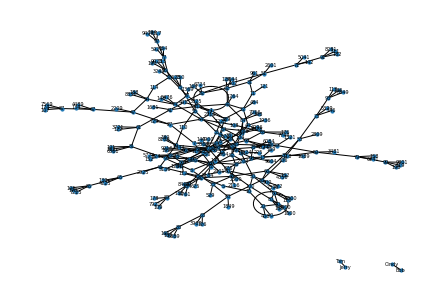

In [ ]:
nx.draw(G,pos,with_labels=True,node_size=10,font_size=5)
plt.show()

In [121]:
a = list(nx.jaccard_coefficient(G))
a

[('Woodward', 'Field', 0.2),
 ('Woodward', 'Jessica', 0.25),
 ('Woodward', 'Terri', 0.0),
 ('Woodward', 'Michael', 0.2),
 ('Woodward', 'Robert', 0.14285714285714285),
 ('Woodward', 'Shawn', 0.0),
 ('Woodward', 'Mabella', 0.25),
 ('Woodward', 'Foster', 0.0),
 ('Woodward', 'Ryker', 0.0),
 ('Woodward', 'Hawking', 0.0),
 ('Woodward', 'Dudley', 0.2),
 ('Woodward', 'CoS', 0.02564102564102564),
 ('Woodward', 'William', 0.16666666666666666),
 ('Woodward', 'Nevada', 0.16666666666666666),
 ('Woodward', 'Blondie', 0.25),
 ('Woodward', 'Basso', 0.25),
 ('Woodward', 'Simmons', 0.0),
 ('Woodward', 'Kendrick', 0.0),
 ('Woodward', 'Felicia', 0.0),
 ('Woodward', 'Jing Han', 0.25),
 ('Woodward', 'Bettye', 0.25),
 ('Woodward', 'Monday', 0.0),
 ('Woodward', 'Rina', 0.25),
 ('Woodward', 'Straight', 0.0),
 ('Woodward', 'Katlyn', 0.0),
 ('Woodward', 'Carin', 0.25),
 ('Woodward', 'Omar', 0.0),
 ('Woodward', 'Pauline', 0.2),
 ('Woodward', 'James', 0.0),
 ('Woodward', 'Milton', 0.14285714285714285),
 ('Woodward